In [1]:
'''%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
!pip install llama-index-readers-file'''


'%pip install llama-index-vector-stores-lancedb\n%pip install llama-index-multi-modal-llms-openai\n%pip install llama-index-embeddings-clip\n%pip install git+https://github.com/openai/CLIP.git\n!pip install llama-index-readers-file'

In [2]:
%pip install llama_index
%pip install -U openai-whisper

  Using cached llama_index_llms_openai-0.5.4-py3-none-any.whl.metadata (3.0 kB)
INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 17.1 MB/s eta 0:00:00
Using cached llama_index_llms_openai-0.5.4-py3-none-any.whl (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310

In [4]:
pip install speechrecognition yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.4 MB/s eta 0:00:00


In [6]:

from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
#from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
import os
print(os.getcwd())
from google.colab import userdata
video_url="https://youtu.be/3dhcmeOTZ_Q"


output_video_path = "/content/video_data/"


# from the video i am going to collect images,audio,text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"


!mkdir mixed_data


filepath=output_video_path + "input_vid.webm"
print(filepath)

/content
mkdir: cannot create directory ‘mixed_data’: File exists
/content/video_data/input_vid.webm


In [26]:
import os

import yt_dlp

def download_video(url, output_path):
    ydl_opts = {
        'outtmpl': f'{output_path}/input_vid',  # auto filename extension
        'format': 'bestvideo+bestaudio/best',
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=True)

        metadata = {
            "Author": info.get("uploader"),
            "Title": info.get("title"),
            "Views": info.get("view_count")
        }

    return metadata




from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )


def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)



def audio_to_text(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
        try:
            # Using Google's free API (needs internet)
            text = recognizer.recognize_google(audio_data)
            return text
        except sr.UnknownValueError:
            return "Sorry, I could not understand the audio."
        except sr.RequestError as e:
            return f"API unavailable: {e}"


video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [24]:

metadata_vid = download_video(video_url, output_video_path)

print(metadata_vid)

[youtube] Extracting URL: https://youtu.be/3dhcmeOTZ_Q
[youtube] 3dhcmeOTZ_Q: Downloading webpage
[youtube] 3dhcmeOTZ_Q: Downloading tv simply player API JSON
[youtube] 3dhcmeOTZ_Q: Downloading tv client config
[youtube] 3dhcmeOTZ_Q: Downloading tv player API JSON
[info] 3dhcmeOTZ_Q: Downloading 1 format(s): 303+251
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: /content/video_data//input_vid.f303.webm
[download] 100% of    7.49MiB in 00:00:00 at 69.36MiB/s  
[download] Destination: /content/video_data//input_vid.f251.webm
[download] 100% of    4.02MiB in 00:00:00 at 46.58MiB/s  
[Merger] Merging formats into "/content/video_data//input_vid.webm"
Deleting original file /content/video_data//input_vid.f251.webm (pass -k to keep)
Deleting original file /content/video_data//input_vid.f303.webm (pass -k to keep)
{'Author': '3-Minute Data Science', 'Title': 'Linear Regression in 3 Minutes', 'Views': 61639}


In [29]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [30]:

video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [31]:
text_data=audio_to_text(output_audio_path)

In [32]:
text_data

"let me regression as a statistical technique for modeling the relationship between an output variable and one or more input variables in layman's terms think of it as fitting a line through some data points as shown here so you can make predictions on unknown data assuming there is a linear relationship between the variables you might be familiar with the linear function y equals MX plus b where why is the output variable also called the dependent variable you may also see expressed as f of x the function of the input variable X on the other hand would serve as the input variable also called the independent variable it's likely you'll see the coefficients MMD expressed his beta 1 and beta 0 respectively so what do the M&P coefficients do the or beta 1 coefficient controls the slope of the line the b or the beta 0 controls the intercept to the line in machine learning we all know as the bias these two coefficients are what we are solving for in linear regression we can also extend to m

In [33]:

with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()


#Text data saved to file

os.remove(output_audio_path)
print("Audio file removed")

Text data saved to file
Audio file removed


In [42]:
pip install llama_index llama_index.embeddings.huggingface llama_index.vector_stores.lancedb llama_index.embeddings.clip

In [37]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext
from llama_index.vector_stores.lancedb import LanceDBVectorStore
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [38]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_store")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_store")

In [39]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [44]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-jxkhlui1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-jxkhlui1
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369549 sha256=9a39589f1dfc8690c8b091d79f9ce5c09ea8e8bfeee0d546c9c9108841233f8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-cef8sfy1/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [45]:
from llama_index.core import StorageContext

embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-MiniLM-L6-v2")

storage_context = StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
    embed_model=embed_model
)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 53.2MiB/s]


In [46]:
retriever_engine=index.as_retriever(similarity_top_k=1, image_similarity_top_k=5)

In [47]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode


def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text


query="can you tell me what is linear regression? explain equation of the multiple linear regression?"


img,text=retrieve(retriever_engine,query)

**Node ID:** 039f9b1f-c517-447e-9a65-c9bf0d62cb38<br>**Similarity:** 0.3714505732059479<br>**Text:** let me regression as a statistical technique for modeling the relationship between an output variable and one or more input variables in layman's terms think of it as fitting a line through some da...<br>

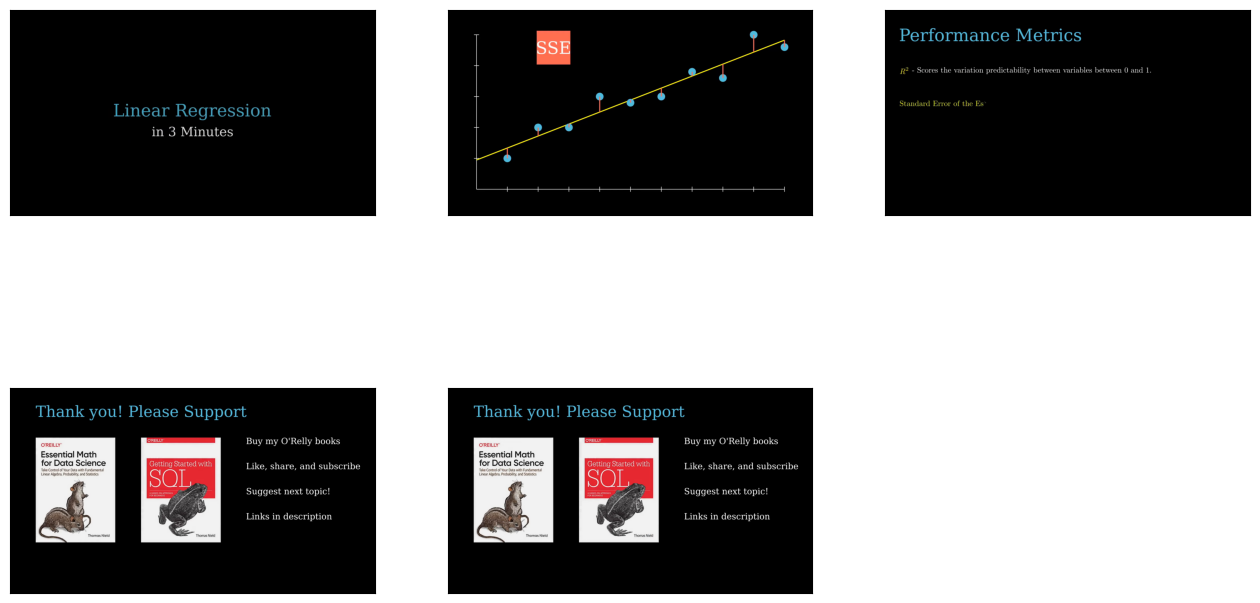

In [51]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >=10:
                break


plot_images(img)
